# Data Dictionary

## SMS Spam Collection Data Dictionary

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-za14{border-color:inherit;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-za14">Column Name</th>
    <th class="tg-7zrl">Description</th>
    <th class="tg-7zrl">Data Type</th>
    <th class="tg-7zrl">Notes</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">v1</td>
    <td class="tg-7zrl">This column contains the label for each SMS message, indicating whether it is legitimate (ham) or spam.</td>
    <td class="tg-7zrl">Categorical (String)</td>
    <td class="tg-7zrl">This is the target variable for a classification task.</td>
  </tr>
  <tr>
    <td class="tg-7zrl">v2</td>
    <td class="tg-7zrl">This column contains the raw text of the SMS message itself.</td>
    <td class="tg-7zrl">Text (String)</td>
    <td class="tg-7zrl">This is the feature variable. It requires preprocessing (e.g.,&nbsp;&nbsp;&nbsp;tokenization, stemming, stop-word removal) before being used in a machine&nbsp;&nbsp;&nbsp;learning model.</td>
  </tr>
</tbody>
</table>

# Import necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [2]:
# PART 1: Install all necessary libraries
!pip install imblearn contractions catboost optuna --upgrade catboost xgboost lightgbm

# Standard Library Imports
import re
import string
import warnings
import os

# Third-Party Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import contractions
from wordcloud import WordCloud

# NLTK Imports and Data Downloads
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Scikit-learn and Related Imports
from sklearn.model_selection import (
    train_test_split, cross_val_score
)
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.ensemble import (
    VotingClassifier, RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier,
    BaggingClassifier, StackingClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, f1_score,
    precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score,
    make_scorer
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.datasets import make_classification, make_moons
from sklearn.multiclass import OneVsRestClassifier

# Imbalance-learn Imports
from imblearn.over_sampling import RandomOverSampler, ADASYN

# XGBoost, LightGBM, and CatBoost Imports
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Global Settings
# Use this to suppress all warnings for cleaner output.
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load dataset

In [3]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv',delimiter=',',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Reorganize dataset

In [4]:
df = df[['v1','v2']]
df = df.rename(columns={'v1': 'Label', 'v2': 'Text'})
df['Label'] = df['Label'].replace({'ham': 'Not spam', 'spam': 'Spam'})
df

,Label,Text
0,Not spam,"Go until jurong point, crazy.. Available only ..."
1,Not spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not spam,U dun say so early hor... U c already then say...
4,Not spam,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,Spam,This is the 2nd time we have tried 2 contact u...
5568,Not spam,Will Ì_ b going to esplanade fr home?
5569,Not spam,"Pity, * was in mood for that. So...any other s..."
5570,Not spam,The guy did some bitching but I acted like i'd...


# Split dataset

In [5]:
# Split the data into training and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42) 

# Print the shapes of the resulting sets
print("train shape:", train.shape)
print("test shape:", test.shape)

train shape: (4457, 2)
test shape: (1115, 2)


# Data Visualization

In [6]:
train.head()

,Label,Text
1978,Not spam,No I'm in the same boat. Still here at my moms...
3989,Spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,Not spam,They r giving a second chance to rahul dengra.
4078,Not spam,O i played smash bros &lt;#&gt; religiously.
4086,Spam,PRIVATE! Your 2003 Account Statement for 07973...


In [7]:
train.isnull().sum()

Label    0
Text     0
dtype: int64

In [8]:
test.isnull().sum()

Label    0
Text     0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 1978 to 860
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4457 non-null   object
 1   Text    4457 non-null   object
dtypes: object(2)
memory usage: 104.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1115 entries, 3245 to 4293
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   1115 non-null   object
 1   Text    1115 non-null   object
dtypes: object(2)
memory usage: 26.1+ KB


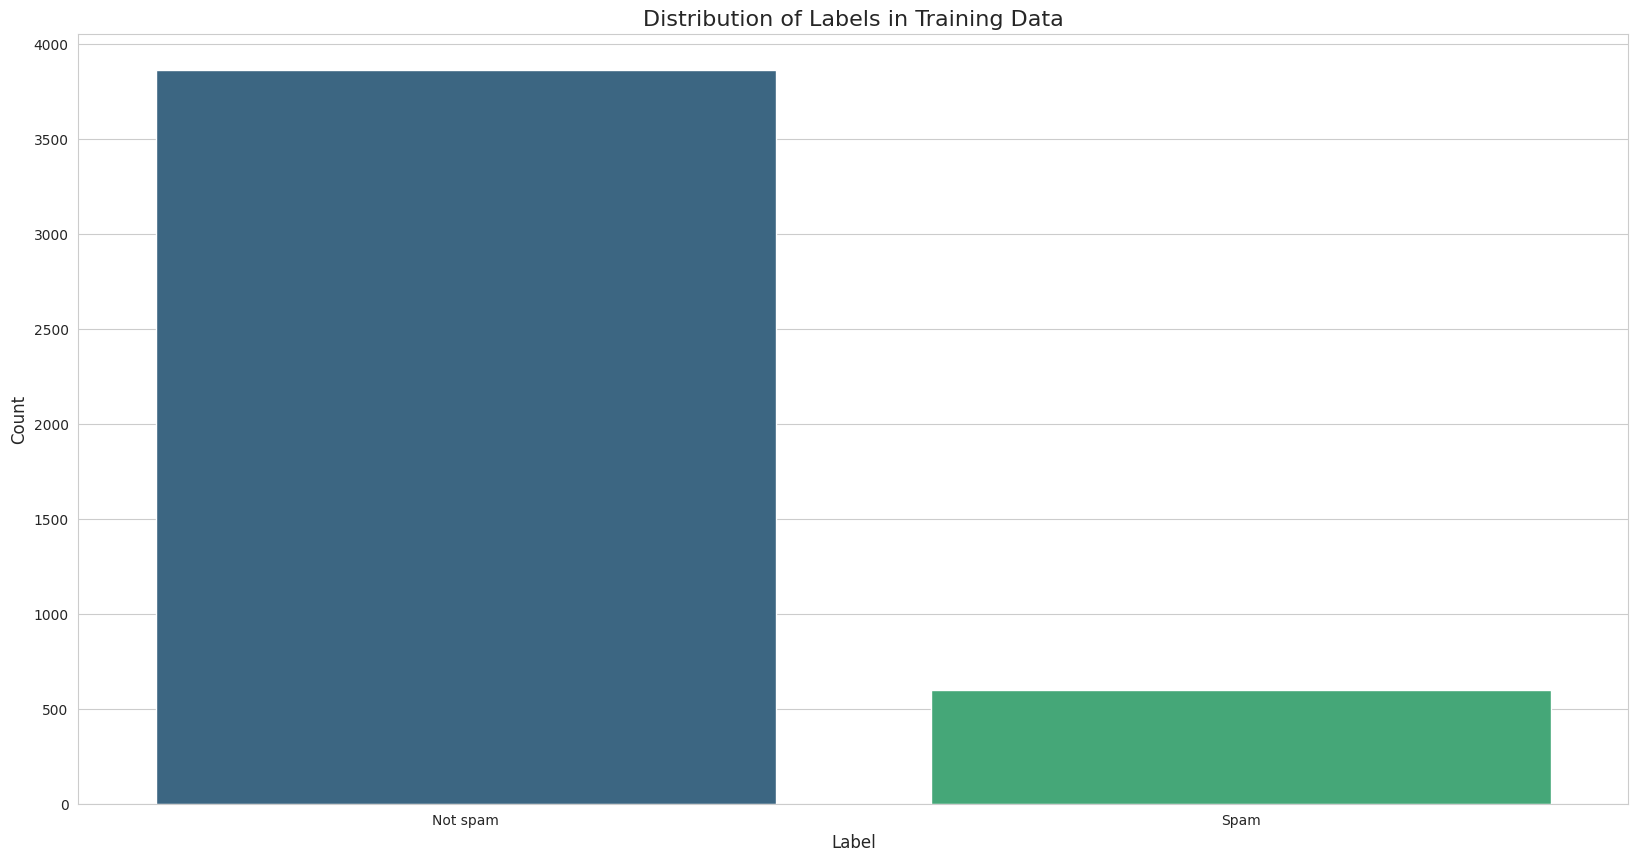

In [11]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create a figure and an axes object
plt.figure(figsize=(20, 10))

# Use seaborn's countplot to plot the distribution of the 'Label' column
# This function automatically calculates the counts of each category and plots them.
sns.countplot(x=train['Label'], palette="viridis")

# Add a title and labels for clarity
plt.title('Distribution of Labels in Training Data', fontsize=16)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display the plot
plt.show()

In [12]:
# Find the longest word in the Text column of the training set
# First, combine all text in the training set into a single string
full_text = ' '.join(train['Text'])

# Split the text into a list of words. We use a regular expression to handle punctuation.
words = re.findall(r'\b\w+\b', full_text.lower())

# Find the longest word using a lambda function and the max() function
longest_word = max(words, key=len)

# Find the total number of words in the Text column of the training set
# The total number of words is simply the length of the 'words' list
total_words = len(words)
# Display the results
print(f"Longest word in the training set: '{longest_word}' (length: {len(longest_word)})")
print(f"Total number of words in the training set: {total_words}")

Longest word in the training set: 'hypotheticalhuagauahahuagahyuhagga' (length: 34)
Total number of words in the training set: 71807


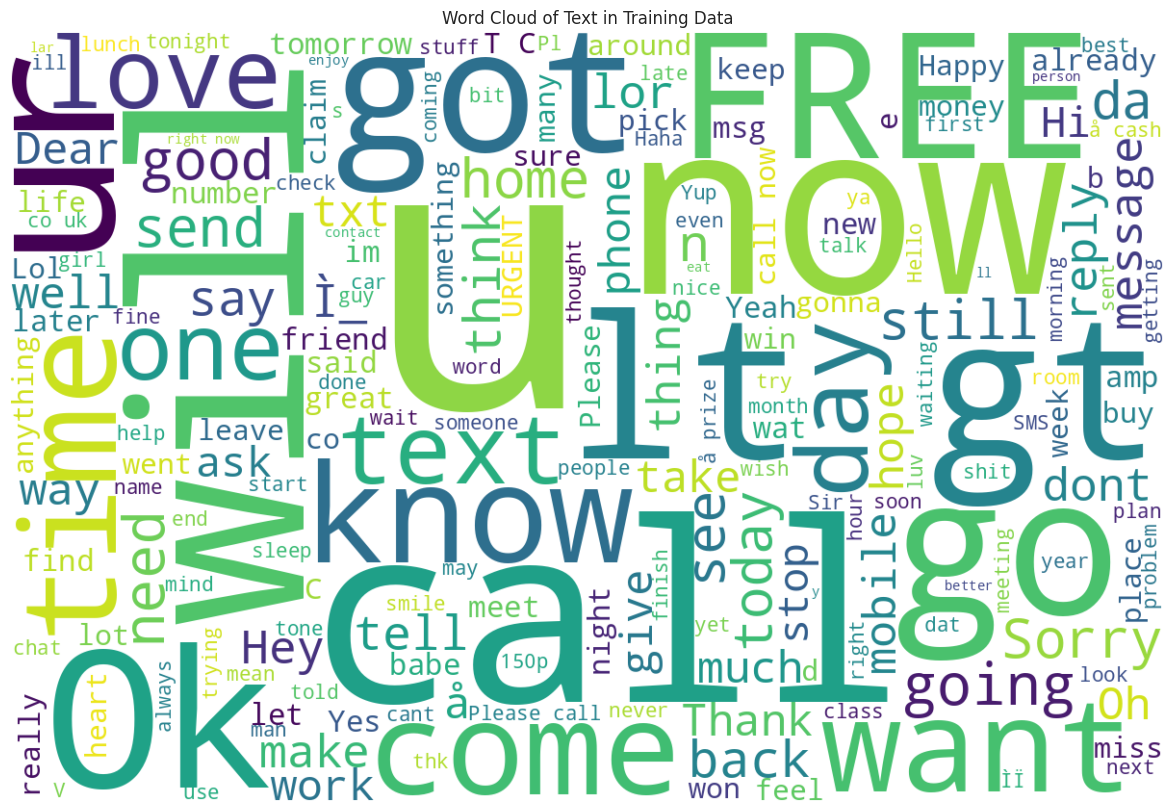

In [13]:
# Visualize the Text column using a word cloud
# Join all the training text into one large string
combined_text = ' '.join(train['Text'])

# Create a WordCloud object
# The background_color can be changed to any color (e.g., 'white', 'black', etc.)
# and the colormap can be changed to any matplotlib colormap.
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='white',
    colormap='viridis'
).generate(combined_text)

# Create a plot to display the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis labels and ticks
plt.title('Word Cloud of Text in Training Data')
plt.show()

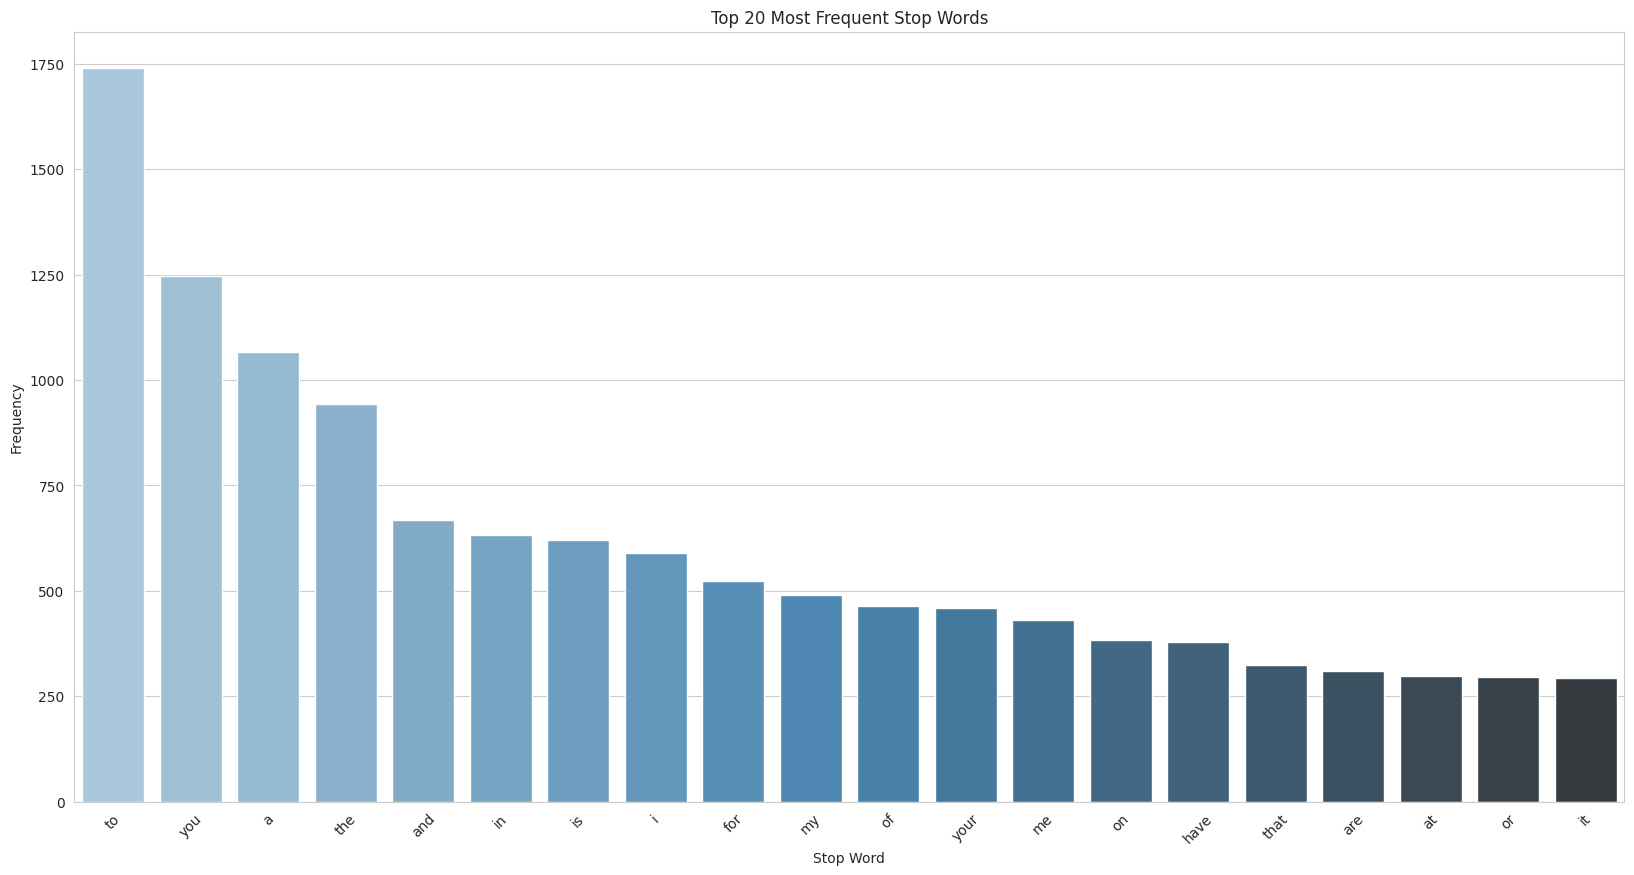

In [14]:
def extract_stopwords_and_count(text):
    stop_words = set(stopwords.words('english'))  # You can customize this for other languages
    words = text.split()
    stopwords_in_text = [word for word in words if word in stop_words]
    word_counts = {}
    for word in stopwords_in_text:
        word_counts[word] = word_counts.get(word, 0) + 1
    return word_counts

train['stopword_counts'] = train['Text'].apply(extract_stopwords_and_count)
all_stopword_counts = []
for counts in train['stopword_counts']:
    all_stopword_counts.extend(list(counts.items()))
stopword_df = pd.DataFrame(all_stopword_counts, columns=['word', 'count'])

top_20_stopwords = stopword_df.groupby('word')['count'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(20, 10))
sns.barplot(x=top_20_stopwords.index, y=top_20_stopwords.values, palette='Blues_d')
plt.xlabel('Stop Word')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Stop Words')
plt.xticks(rotation=45)
plt.show()

In [15]:
train.drop(['stopword_counts'],axis=1,inplace=True)
train

,Label,Text
1978,Not spam,No I'm in the same boat. Still here at my moms...
3989,Spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935,Not spam,They r giving a second chance to rahul dengra.
4078,Not spam,O i played smash bros &lt;#&gt; religiously.
4086,Spam,PRIVATE! Your 2003 Account Statement for 07973...
...,...,...
3772,Not spam,I came hostel. I m going to sleep. Plz call me...
5191,Not spam,"Sorry, I'll call later"
5226,Not spam,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Not spam,Nt joking seriously i told


# Feature Engineering

## Split Features and Target Labels

In [16]:
x_train = train.drop('Label', axis=1) 
y_train = train['Label'] 
x_test = test.drop('Label', axis=1) 
y_test = test['Label'] 

# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4457, 1)
y_train shape: (4457,)
X_test shape: (1115, 1)
y_test shape: (1115,)


## Text cleaning

In [17]:
# Print the shapes of the resulting sets
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

# The user-provided functions
def remove_special_chars(text):
    """
    Removes emojis, punctuation, special characters, and extra spaces from text.
    """
    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags
        "]+",
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)
    
    # Remove special characters, punctuation, and extra spaces
    text = text.encode('ascii', 'ignore').decode('ascii')  # Remove non-ASCII characters
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower().strip()  # Convert to lowercase and strip extra spaces
    return text

def tokenize_text(text):
    """
    Function to tokenize the text into individual words
    """
    if isinstance(text, str):
        return word_tokenize(text)
    else:
        return []

def remove_stopwords(tokens):
    """
    Function to remove stopwords from the tokenized text
    """
    stop_words = set(stopwords.words('english'))
    if isinstance(tokens, list):
        return [word for word in tokens if word not in stop_words]
    else:
        return []

def lemmatize_tokens(tokenized_list):
    """
    Lemmatize tokens to their base form.
    """
    lemmatizer = WordNetLemmatizer()
    if isinstance(tokenized_list, list):
        return [lemmatizer.lemmatize(word) for word in tokenized_list]
    else:
        return []

# Create a preprocessing pipeline
def preprocess_text_pipeline(text):
    """
    A full preprocessing pipeline to apply to the text data.
    1. Expand contractions using the 'contractions' library
    2. Remove special characters and clean the text
    3. Tokenize the text
    4. Remove stopwords
    5. Lemmatize the tokens
    """
    if not isinstance(text, str) or pd.isna(text):
        return ""  # Handle non-string or NaN inputs

    # 1. Expand contractions
    expanded_text = contractions.fix(text)

    # 2. Remove special characters and clean the text
    cleaned_text = remove_special_chars(expanded_text)

    # 3. Tokenize the text
    tokens = tokenize_text(cleaned_text)

    # 4. Remove stopwords
    tokens_without_stopwords = remove_stopwords(tokens)

    # 5. Lemmatize the tokens
    lemmas = lemmatize_tokens(tokens_without_stopwords)

    # Join tokens back into a string for vectorization
    return " ".join(lemmas)

# --- Apply the preprocessing pipeline to the 'Text' column of X_train and X_test ---
print("--- Sample before preprocessing ---")
print(x_train['Text'].iloc[0])  # Access the 'Text' column specifically

print("\n--- Applying preprocessing to X_train and X_test ---\n")

# Apply preprocessing to the 'Text' column
x_train_p = x_train['Text'].apply(preprocess_text_pipeline).to_frame()
x_test_p = x_test['Text'].apply(preprocess_text_pipeline).to_frame()

print("--- Sample after preprocessing (X_train) ---")
print(x_train_p.iloc[0])

print("\n--- Preprocessed X_train head ---")
print(x_train_p.head())

print("\n--- Preprocessed X_test head ---")
print(x_test_p.head())

# Verify that no data is lost
print("\n--- Shapes after preprocessing ---")
print("x_train_p shape:", x_train_p.shape)
print("x_test_p shape:", x_test_p.shape)

X_train shape: (4457, 1)
y_train shape: (4457,)
X_test shape: (1115, 1)
y_test shape: (1115,)
--- Sample before preprocessing ---
No I'm in the same boat. Still here at my moms. Check me out on yo. I'm half naked.

--- Applying preprocessing to X_train and X_test ---

--- Sample after preprocessing (X_train) ---
Text    boat still mom check yo half naked
Name: 1978, dtype: object

--- Preprocessed X_train head ---
                                                   Text
1978                 boat still mom check yo half naked
3989  bank granite issue strongbuy explosive pick me...
3935                r giving second chance rahul dengra
4078                 played smash bros ltgt religiously
4086  private 2003 account statement 07973788240 sho...

--- Preprocessed X_test head ---
                                                   Text
3245  funny fact nobody teach volcano 2 erupt tsunam...
944   sent score sophas secondary application school...
1044  know someone know fancy call 090580972

In [18]:
x_train = x_train_p.copy()
x_test = x_test_p.copy()

## Encode Target Label

In [19]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [20]:
# --- Show the mapping from original class to encoded value ---
print("\n--- Original Class to Encoded Value Mapping ---")
for original_class, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"'{original_class}' -> {encoded_value}")
print("-" * 30)


--- Original Class to Encoded Value Mapping ---
'Not spam' -> 0
'Spam' -> 1
------------------------------


## Text Representation (TF-IDF)

In [21]:
x_train = x_train['Text'].astype(str).tolist()
x_test = x_test['Text'].astype(str).tolist()

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=40) # number of longest word from data visualization

# Fit and transform the preprocessed text data
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

# Convert sparse matrix to dense array
x_train_tfidf = x_train_tfidf.toarray()
x_test_tfidf = x_test_tfidf.toarray()

# Display the TF-IDF features
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
x_train = x_train_tfidf.copy()
x_test = x_test_tfidf.copy()

## Oversampling


Class distribution in y_train BEFORE ADASYN:
0    86.60534
1    13.39466
Name: proportion, dtype: float64


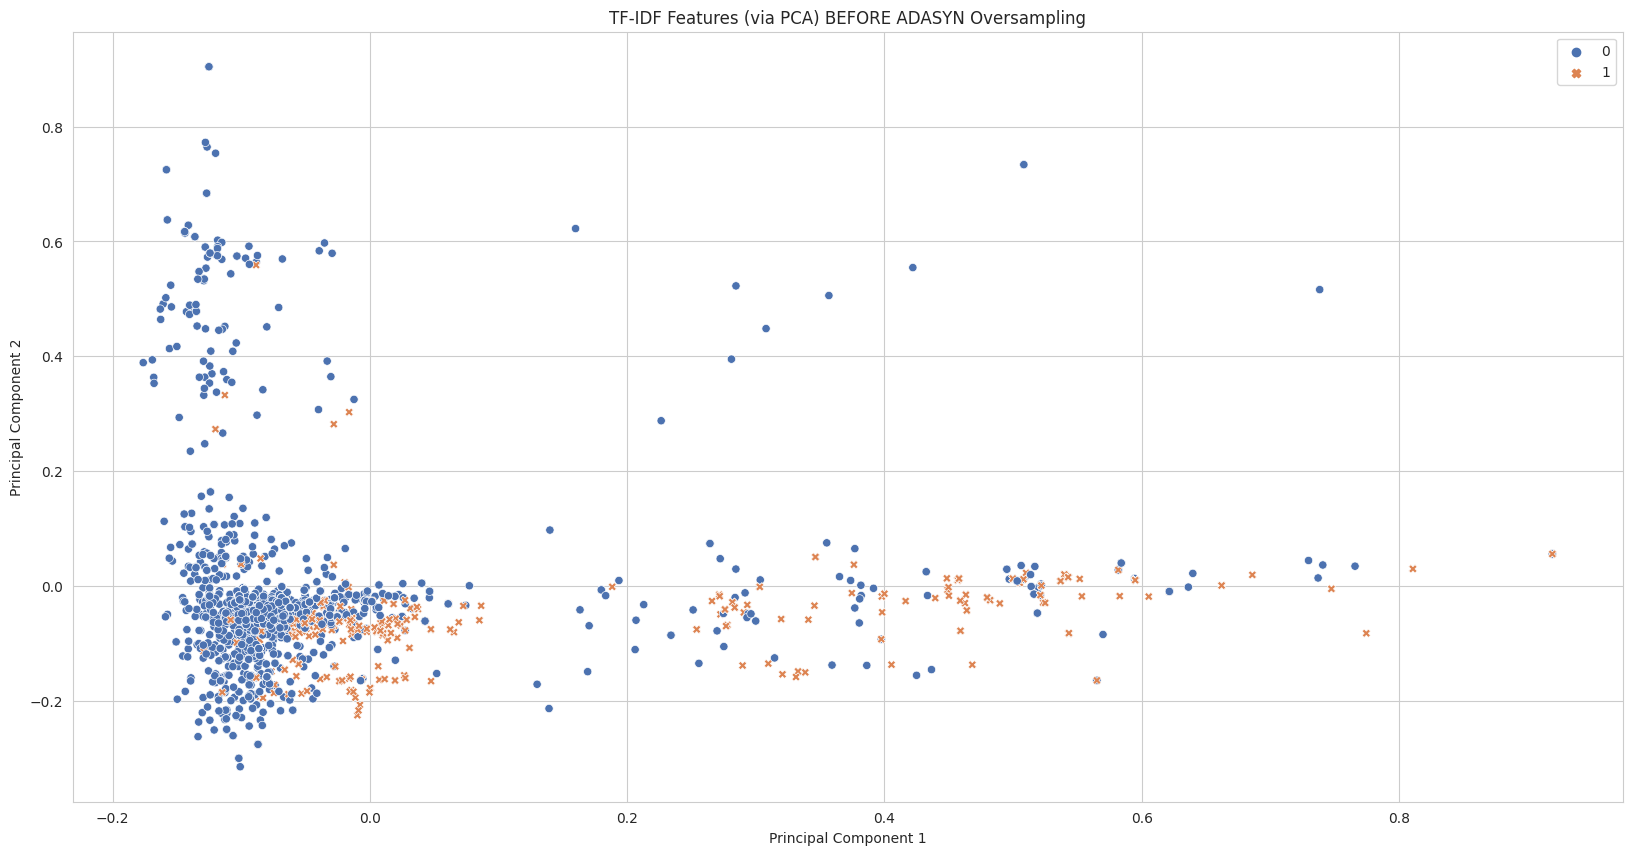

In [23]:
# --- Visualize the data AFTER oversampling ---
print("\nClass distribution in y_train BEFORE ADASYN:")
print(pd.Series(y_train).value_counts(normalize=True) * 100)

# Apply PCA to reduce the 40 TF-IDF features to 2 components for plotting
pca = PCA(n_components=2, random_state=42)
x_train_pca = pca.fit_transform(x_train_tfidf)

plt.figure(figsize=(20, 10))
sns.scatterplot(
    x=x_train_pca[:, 0],
    y=x_train_pca[:, 1],
    hue=y_train,
    style=y_train,
    palette='deep'
)
plt.title('TF-IDF Features (via PCA) BEFORE ADASYN Oversampling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
# --- Apply ADASYN oversampling ---
# Initialize the ADASYN sampler
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Resample the training data. ADASYN handles sparse matrices from TF-IDF correctly.
x_train_resampled, y_train_resampled = adasyn.fit_resample(x_train_tfidf, y_train)


Class distribution in y_train AFTER ADASYN:
1    50.251321
0    49.748679
Name: proportion, dtype: float64


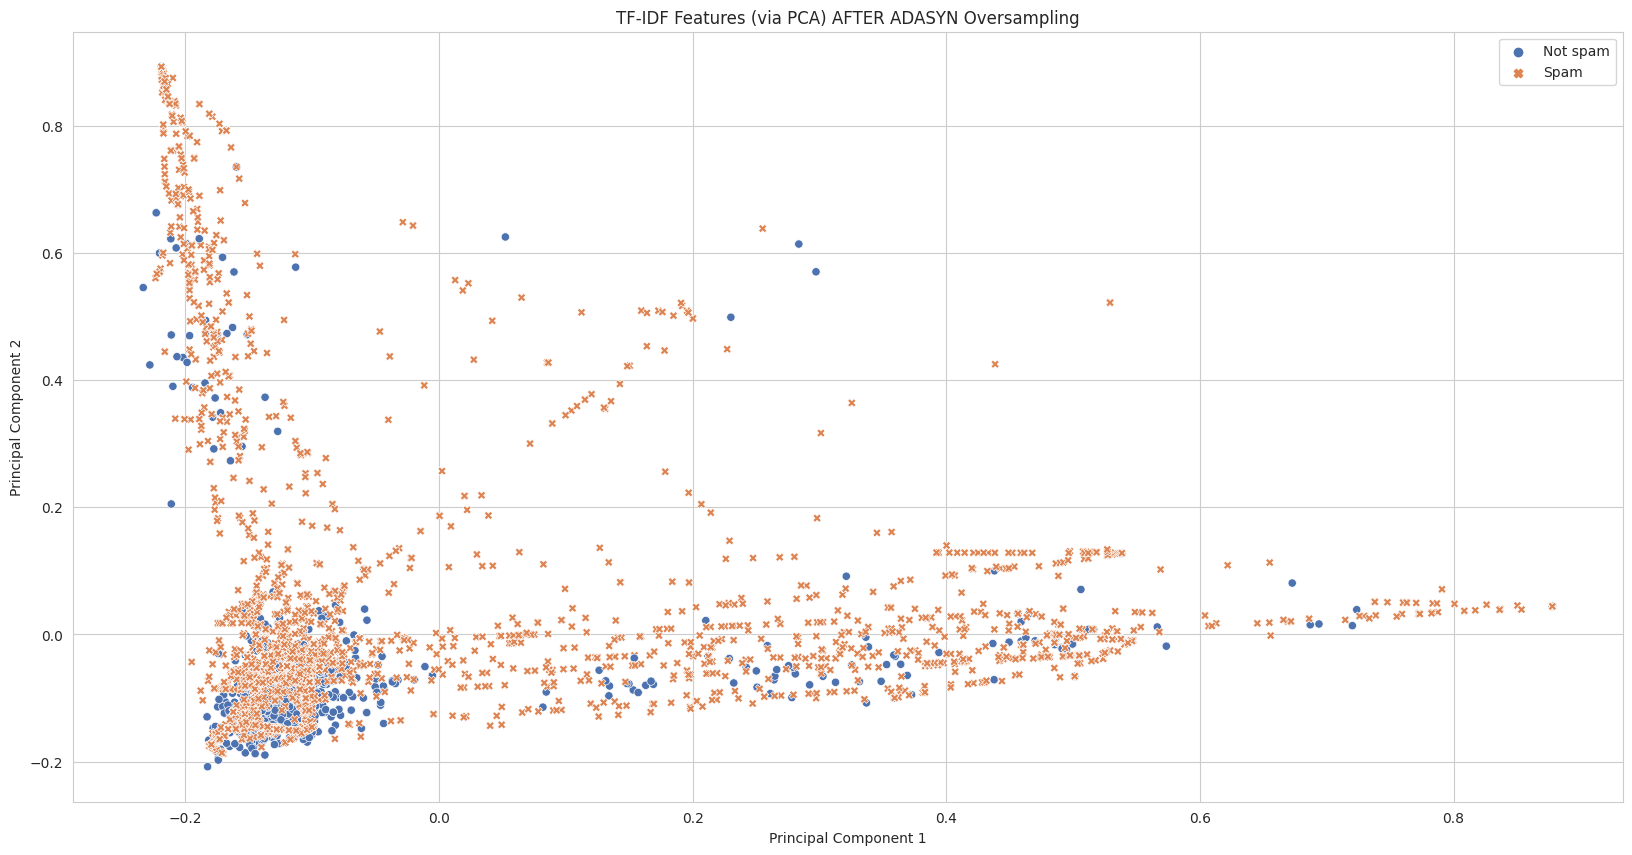

In [25]:
# --- Visualize the data AFTER oversampling ---
print("\nClass distribution in y_train AFTER ADASYN:")
print(pd.Series(y_train_resampled).value_counts(normalize=True) * 100)

# Re-apply PCA to the resampled data for visualization
# Note: It's important to fit PCA again on the resampled data
x_train_resampled_pca = pca.fit_transform(x_train_resampled)

plt.figure(figsize=(20, 10))
sns.scatterplot(
    x=x_train_resampled_pca[:, 0],
    y=x_train_resampled_pca[:, 1],
    hue=pd.Series(y_train_resampled).map(dict(enumerate(le.classes_))),
    style=pd.Series(y_train_resampled).map(dict(enumerate(le.classes_))),
    palette='deep'
)
plt.title('TF-IDF Features (via PCA) AFTER ADASYN Oversampling')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
x_train = x_train_resampled
y_train = y_train_resampled

## Dimensionality Reduction

In [27]:
# Apply PCA to reduce the 40 TF-IDF features to 2 components for plotting
pca = PCA(n_components=2, random_state=42)
x_train = pca.fit_transform(x_train_resampled)
x_test = pca.transform(x_test)

# Verify shape
print("\n--- Shapes after preprocessing ---")
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


--- Shapes after preprocessing ---
x_train shape: (7759, 2)
x_test shape: (1115, 2)


# Model Building

## Machine learning model

In [28]:
# Define machine learning models
ml_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("XGBoost", XGBClassifier(eval_metric='logloss')), 
    ("LightGBM", LGBMClassifier(verbose=-1)),
    ("CatBoost", CatBoostClassifier(verbose=0))
]

# A list to store the results for easy comparison
results = []
model_names = []

print("Starting cross-validation on the oversampled training data...\n")

for model_name, model in ml_models:
    print(f'{model_name}:')
    try:
        # Perform K-Fold Cross-Validation with 5 folds
        # We use the resampled data for training and evaluation
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

        print(f'\tK-Fold Cross-Validation Scores: {np.round(cv_scores, 4)}')
        print('-' * 100)
        print(f'\tAverage K-Fold Cross-Validation Accuracy: {np.round(cv_scores.mean(), 4)}\n')

        results.append(cv_scores)
        model_names.append(model_name)
    except Exception as e:
        print(f'\tError occurred during cross-validation for {model_name}: {str(e)}')
        print('-' * 100)
        results.append(np.array([np.nan] * 5))  # Append NaN scores for failed model
        model_names.append(model_name)

# Display a final summary table
print("---------------- FINAL SUMMARY ----------------")
for i, name in enumerate(model_names):
    mean_score = np.round(np.nanmean(results[i]), 4) if not np.all(np.isnan(results[i])) else "N/A"
    print(f"{name:<25} | Avg Accuracy: {mean_score}")
print("-----------------------------------------------")

Starting cross-validation on the oversampled training data...

Logistic Regression:
	K-Fold Cross-Validation Scores: [0.7326 0.7236 0.7146 0.6991 0.6757]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.7091

KNN:
	K-Fold Cross-Validation Scores: [0.7732 0.7919 0.7751 0.7146 0.7331]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.7576

Decision Tree:
	K-Fold Cross-Validation Scores: [0.8125 0.8344 0.7925 0.7957 0.7943]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.8059

Random Forest Classifier:
	K-Fold Cross-Validation Scores: [0.8222 0.8383 0.808  0.8093 0.8072]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation 

## Decision boundary of machine learning model

Fitting Logistic Regression model...
Plotting decision boundary for Logistic Regression...
Fitting KNN model...
Plotting decision boundary for KNN...
Fitting Decision Tree model...
Plotting decision boundary for Decision Tree...
Fitting Random Forest Classifier model...
Plotting decision boundary for Random Forest Classifier...
Fitting XGBoost model...
Plotting decision boundary for XGBoost...
Fitting LightGBM model...
Plotting decision boundary for LightGBM...
Fitting CatBoost model...
Plotting decision boundary for CatBoost...


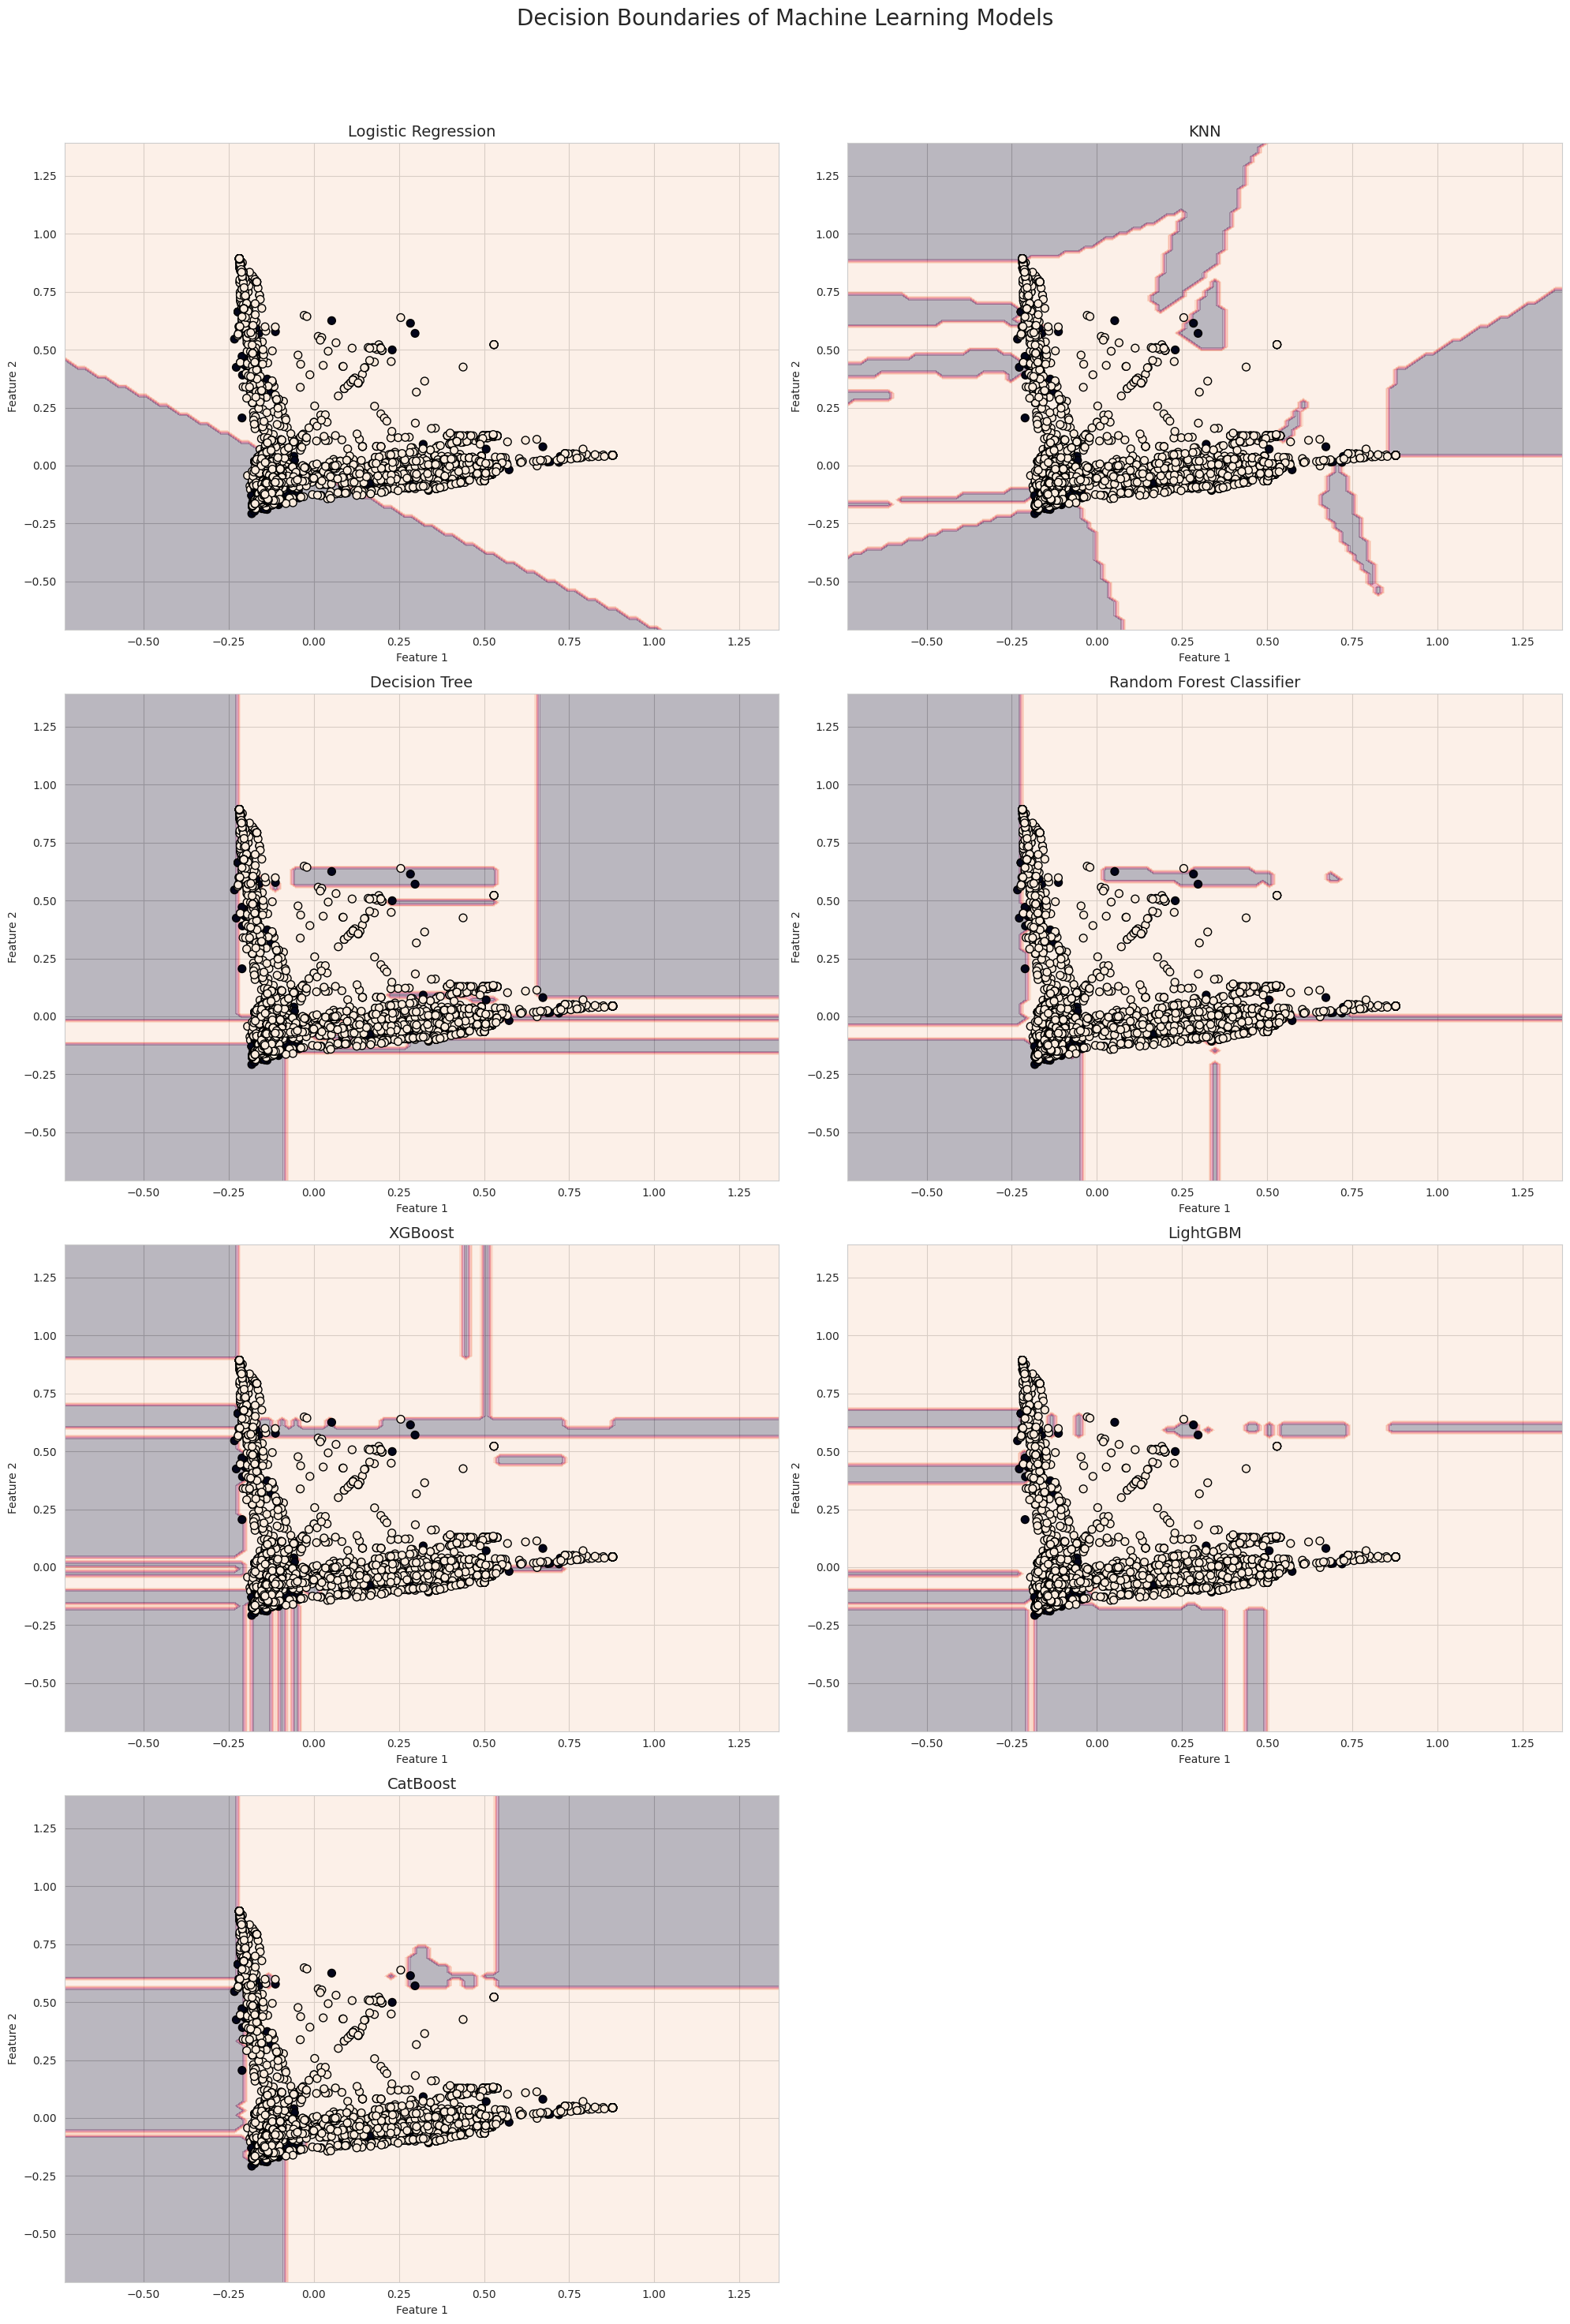


Plotting complete. Check the displayed window for the decision boundaries.


In [29]:
# Define machine learning models
ml_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest Classifier", RandomForestClassifier()),
    ("XGBoost", XGBClassifier(eval_metric='logloss')), 
    ("LightGBM", LGBMClassifier(verbose=-1)),
    ("CatBoost", CatBoostClassifier(verbose=0))
]

# --- Define the function to plot the decision boundary ---
def plot_decision_boundary(model, X_train, y_train, ax, title):
    """
    Plots the decision boundary for a given model on a Matplotlib axis.
    
    Args:
        model (estimator): The trained scikit-learn model.
        X_train (np.array): The training data features.
        y_train (np.array): The training data labels.
        ax (matplotlib.axes.Axes): The axis to plot on.
        title (str): The title for the plot.
    """
    # Create a meshgrid to plot the decision surface.
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Predict the class for each point in the meshgrid.
    # We predict on the flattened meshgrid and then reshape it.
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and the original training points.
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k')
    
    # Set the plot title and axis labels.
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# --- Plot the decision boundaries for each model ---
# Create a figure with a 2x4 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 30))
fig.suptitle('Decision Boundaries of Machine Learning Models', fontsize=20)
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through the list of models, fit them, and plot their boundaries
for i, (name, model) in enumerate(ml_models):
    print(f"Fitting {name} model...")
    model.fit(x_train, y_train)
    print(f"Plotting decision boundary for {name}...")
    plot_decision_boundary(model, x_train, y_train, axes[i], name)

# Hide the last subplot since we only have 7 models for a 2x4 grid
axes[-1].axis('off')

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for the main title
plt.show()

print("\nPlotting complete. Check the displayed window for the decision boundaries.")

## Ensemble model

In [30]:
# Define ensemble models with unique estimator names
es_models = [
    ("Voting", VotingClassifier(estimators=[
        ("Random Forest Classifier", RandomForestClassifier()),
        ("XGBoost", XGBClassifier(n_jobs=-1)),
        ("LightGBM", LGBMClassifier(verbose=-1)),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("Decision Tree", DecisionTreeClassifier())
    ], n_jobs=-1, voting='soft')),
    ("Stacking", StackingClassifier(final_estimator=RandomForestClassifier(), estimators=[
        ("XGBoost", XGBClassifier(n_jobs=-1)),  # Unique name
        ("LightGBM", LGBMClassifier(verbose=-1)),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("Decision Tree", DecisionTreeClassifier())
    ], n_jobs=-1))
]

# A list to store the results for easy comparison
results = []
model_names = []

print("Starting cross-validation on the oversampled training data...\n")

for model_name, model in es_models:
    print(f'{model_name}:')
    try:
        # Perform K-Fold Cross-Validation with 5 folds
        # We use the resampled data for training and evaluation
        cv_scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')

        print(f'\tK-Fold Cross-Validation Scores: {np.round(cv_scores, 4)}')
        print('-' * 100)
        print(f'\tAverage K-Fold Cross-Validation Accuracy: {np.round(cv_scores.mean(), 4)}\n')

        results.append(cv_scores)
        model_names.append(model_name)
    except Exception as e:
        print(f'\tError occurred during cross-validation for {model_name}: {str(e)}')
        print('-' * 100)
        results.append(np.array([np.nan] * 5))  # Append NaN scores for failed model
        model_names.append(model_name)

# Display a final summary table
print("---------------- FINAL SUMMARY ----------------")
for i, name in enumerate(model_names):
    mean_score = np.round(np.nanmean(results[i]), 4) if not np.all(np.isnan(results[i])) else "N/A"
    print(f"{name:<25} | Avg Accuracy: {mean_score}")
print("-----------------------------------------------")

Starting cross-validation on the oversampled training data...

Voting:
	K-Fold Cross-Validation Scores: [0.8299 0.846  0.8086 0.8041 0.8053]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.8188

Stacking:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

	K-Fold Cross-Validation Scores: [0.828  0.8202 0.7932 0.7893 0.7505]
----------------------------------------------------------------------------------------------------
	Average K-Fold Cross-Validation Accuracy: 0.7962

---------------- FINAL SUMMARY ----------------
Voting                    | Avg Accuracy: 0.8188
Stacking                  | Avg Accuracy: 0.7962
-----------------------------------------------


## Decision boundary of ensemble model

Fitting Voting model...
Plotting decision boundary for Voting...
Fitting Stacking model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Plotting decision boundary for Stacking...


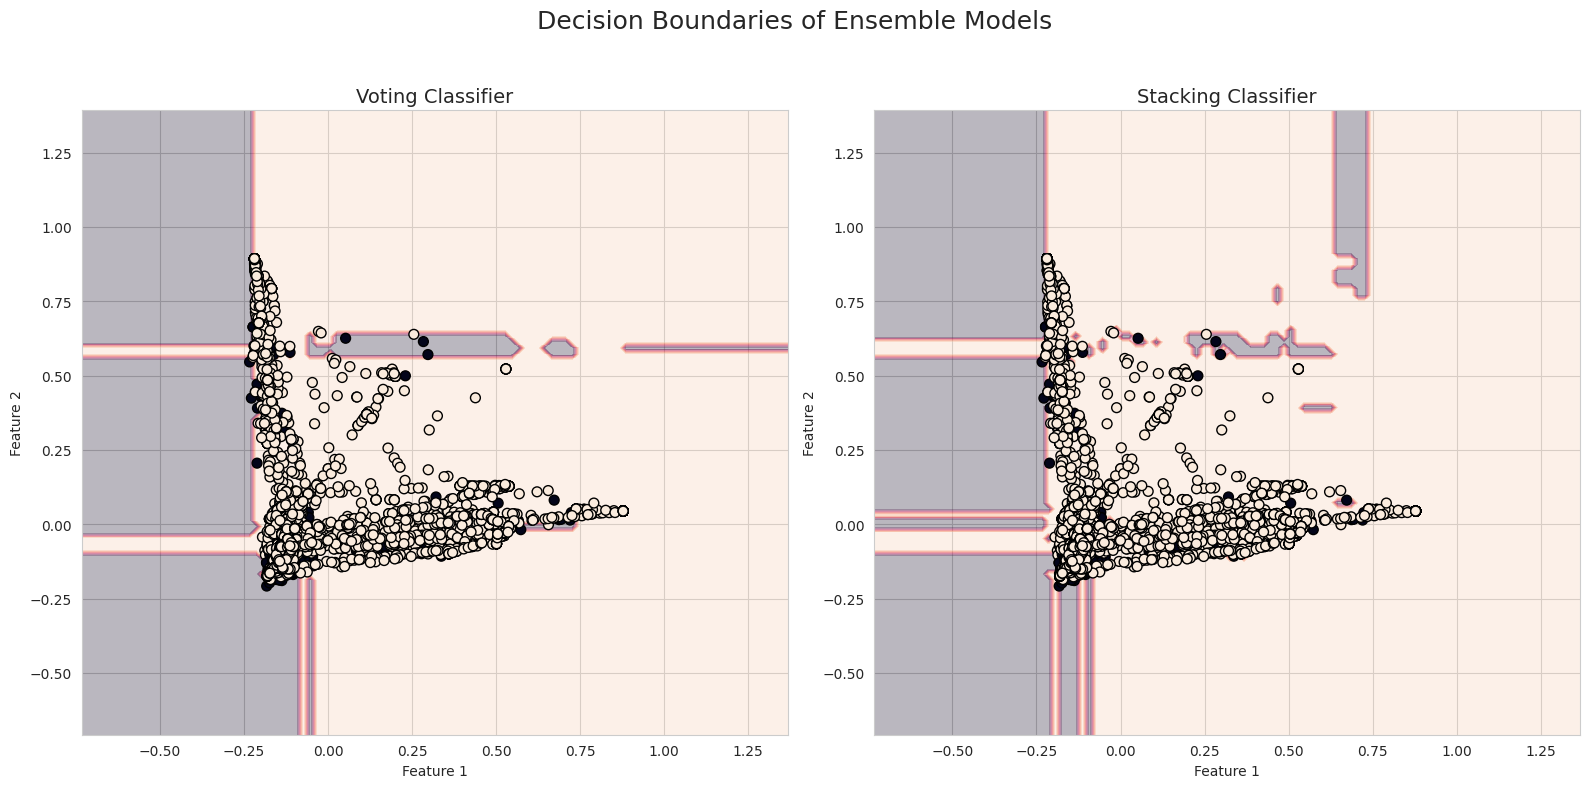


Plotting complete. Check the displayed window for the decision boundaries.


In [31]:
# --- Define the ensemble models ---
es_models = [
    ("Voting", VotingClassifier(estimators=[
        ("Random Forest Classifier", RandomForestClassifier()),
        ("XGBoost", XGBClassifier(n_jobs=-1)),
        ("LightGBM", LGBMClassifier(verbose=-1)),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("Decision Tree", DecisionTreeClassifier())
    ], n_jobs=-1, voting='soft')),
    ("Stacking", StackingClassifier(final_estimator=RandomForestClassifier(), estimators=[
        ("XGBoost", XGBClassifier(n_jobs=-1)),  # Unique name
        ("LightGBM", LGBMClassifier(verbose=-1)),
        ("CatBoost", CatBoostClassifier(verbose=0)),
        ("Decision Tree", DecisionTreeClassifier())
    ], n_jobs=-1))
]

# --- Define the function to plot the decision boundary ---
def plot_decision_boundary(model, X_train, y_train, ax, title):
    """
    Plots the decision boundary for a given model on a Matplotlib axis.

    Args:
        model (estimator): The trained scikit-learn model.
        X_train (np.array): The training data features.
        y_train (np.array): The training data labels.
        ax (matplotlib.axes.Axes): The axis to plot on.
        title (str): The title for the plot.
    """
    # Create a meshgrid to plot the decision surface
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training points
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, edgecolor='k')
    
    # Set the title and axis labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

# --- Plot the decision boundaries for each model ---
# Create a figure with two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Decision Boundaries of Ensemble Models', fontsize=18)

# Loop through the list of models, fit them, and plot their boundaries
for i, (name, model) in enumerate(es_models):
    print(f"Fitting {name} model...")
    model.fit(x_train, y_train)
    print(f"Plotting decision boundary for {name}...")
    plot_decision_boundary(model, x_train, y_train, axes[i], f'{name} Classifier')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust rect to make space for the main title
plt.show()

print("\nPlotting complete. Check the displayed window for the decision boundaries.")

## Hyperparameters tuning

In [32]:
def objective(trial):
    """
    Objective function for Optuna to tune both base models and VotingClassifier weights.

    This function suggests hyperparameters for each individual classifier
    and for the overall ensemble's weights.

    Args:
        trial (optuna.Trial): A trial object from Optuna to suggest parameters.

    Returns:
        float: The mean accuracy from 5-fold cross-validation.
    """

    # --- Step 1: Suggest hyperparameters for each base classifier ---

    # RandomForestClassifier
    rf_params = {
        'n_estimators': trial.suggest_int('rf_n_estimators', 50, 200),
        'max_depth': trial.suggest_int('rf_max_depth', 5, 20),
        'min_samples_split': trial.suggest_float('rf_min_samples_split', 0.05, 1.0, log=True),
        'min_samples_leaf': trial.suggest_float('rf_min_samples_leaf', 0.01, 0.5, log=True),
        'random_state': 42
    }
    rf_clf = RandomForestClassifier(**rf_params)
    
    # XGBClassifier
    xgb_params = {
        'n_estimators': trial.suggest_int('xgb_n_estimators', 50, 200),
        'max_depth': trial.suggest_int('xgb_max_depth', 3, 10),
        'learning_rate': trial.suggest_float('xgb_learning_rate', 1e-4, 1e-1, log=True),
        'subsample': trial.suggest_float('xgb_subsample', 0.5, 1.0),
        # 'use_label_encoder' is deprecated and no longer needed in modern versions of XGBoost.
        # Removing it is a cleaner fix for the warning than just ignoring it.
        'eval_metric': 'logloss',
        'n_jobs': -1,
        'random_state': 42
    }
    xgb_clf = XGBClassifier(**xgb_params)
    
    # LGBMClassifier
    lgbm_params = {
        'n_estimators': trial.suggest_int('lgbm_n_estimators', 50, 200),
        'max_depth': trial.suggest_int('lgbm_max_depth', 5, 20),
        'learning_rate': trial.suggest_float('lgbm_learning_rate', 1e-4, 1e-1, log=True),
        'verbose': -1,
        'n_jobs': -1,
        'random_state': 42
    }
    lgbm_clf = LGBMClassifier(**lgbm_params)
    
    # CatBoostClassifier
    cat_params = {
        'iterations': trial.suggest_int('cat_iterations', 50, 200),
        'learning_rate': trial.suggest_float('cat_learning_rate', 1e-4, 1e-1, log=True),
        'verbose': 0,
        'random_state': 42
    }
    cat_clf = CatBoostClassifier(**cat_params)
    
    # DecisionTreeClassifier
    dt_params = {
        'max_depth': trial.suggest_int('dt_max_depth', 3, 15),
        'min_samples_split': trial.suggest_float('dt_min_samples_split', 0.05, 1.0, log=True),
        'min_samples_leaf': trial.suggest_float('dt_min_samples_leaf', 0.01, 0.5, log=True),
        'random_state': 42
    }
    dt_clf = DecisionTreeClassifier(**dt_params)
    
    # Define the list of base estimators with their tuned hyperparameters
    estimators = [
        ("Random Forest Classifier", rf_clf),
        ("XGBoost", xgb_clf),
        ("LightGBM", lgbm_clf),
        ("CatBoost", cat_clf),
        ("Decision Tree", dt_clf)
    ]
    
    # --- Step 2: Suggest weights for the VotingClassifier ---
    weights = [
        trial.suggest_float("weight_rf", 0.0, 1.0),
        trial.suggest_float("weight_xgb", 0.0, 1.0),
        trial.suggest_float("weight_lgbm", 0.0, 1.0),
        trial.suggest_float("weight_cat", 0.0, 1.0),
        trial.suggest_float("weight_dt", 0.0, 1.0)
    ]
    
    # Normalize the weights so they sum to 1
    total_weight = sum(weights)
    normalized_weights = [w / total_weight if total_weight > 0 else 1/len(weights) for w in weights]
    
    # --- Step 3: Create and evaluate the VotingClassifier ---
    voting_clf = VotingClassifier(
        estimators=estimators,
        voting='soft',
        weights=normalized_weights,
        n_jobs=-1
    )

    # Perform cross-validation to get the accuracy
    score = cross_val_score(voting_clf, x_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1)
    
    return score.mean()

# --- The main script execution starts here, without the '__main__' check ---

# Create an Optuna study to maximize the accuracy
study = optuna.create_study(direction="maximize")

print("Starting Optuna hyperparameter tuning...")

# Run the optimization process for 100 trials
study.optimize(objective, n_trials=30)

print("\n---------------- TUNING COMPLETE ----------------")
print(f"Number of finished trials: {len(study.trials)}")
print(f"Best trial value (Mean Cross-Validation Accuracy): {study.best_value:.4f}")

# Print the best combination of hyperparameters found
print("Best hyperparameters found:")
best_params = study.best_params
for key, value in best_params.items():
    if key.startswith('weight_'):
        total_weight = sum(v for k, v in best_params.items() if k.startswith('weight_'))
        normalized_weight = value / total_weight if total_weight > 0 else 0
        print(f"  {key:<15}: {normalized_weight:.4f} (normalized)")
    else:
        print(f"  {key:<15}: {value}")
        
print("-------------------------------------------------")

[I 2025-08-17 15:16:59,136] A new study created in memory with name: no-name-b0ae54bd-7109-4346-bdfe-c5eb7aa93dce


Starting Optuna hyperparameter tuning...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-08-17 15:17:07,100] Trial 0 finished with 


---------------- TUNING COMPLETE ----------------
Number of finished trials: 30
Best trial value (Mean Cross-Validation Accuracy): 0.8679
Best hyperparameters found:
  rf_n_estimators: 152
  rf_max_depth   : 17
  rf_min_samples_split: 0.30454981070619574
  rf_min_samples_leaf: 0.01803404353762758
  xgb_n_estimators: 174
  xgb_max_depth  : 6
  xgb_learning_rate: 0.08513170348183967
  xgb_subsample  : 0.8902475155699645
  lgbm_n_estimators: 195
  lgbm_max_depth : 16
  lgbm_learning_rate: 0.00010501448541431062
  cat_iterations : 197
  cat_learning_rate: 0.06994138451796475
  dt_max_depth   : 8
  dt_min_samples_split: 0.09120448276608056
  dt_min_samples_leaf: 0.015190286306565201
  weight_rf      : 0.2156 (normalized)
  weight_xgb     : 0.1923 (normalized)
  weight_lgbm    : 0.1627 (normalized)
  weight_cat     : 0.2640 (normalized)
  weight_dt      : 0.1654 (normalized)
-------------------------------------------------


## Train the model with the best hyperparameters

In [33]:
print("\nTraining the final VotingClassifier with the best hyperparameters...")

# Extract the best parameters from the study
best_params = study.best_params

# Separate the hyperparameters for each classifier and the weights
rf_best_params = {k.replace('rf_', ''): v for k, v in best_params.items() if k.startswith('rf_')}
xgb_best_params = {k.replace('xgb_', ''): v for k, v in best_params.items() if k.startswith('xgb_')}
lgbm_best_params = {k.replace('lgbm_', ''): v for k, v in best_params.items() if k.startswith('lgbm_')}
cat_best_params = {k.replace('cat_', ''): v for k, v in best_params.items() if k.startswith('cat_')}
dt_best_params = {k.replace('dt_', ''): v for k, v in best_params.items() if k.startswith('dt_')}

# Instantiate the base classifiers with the best parameters
best_rf_clf = RandomForestClassifier(**rf_best_params)
best_xgb_clf = XGBClassifier(**xgb_best_params, eval_metric='logloss', n_jobs=-1)
best_lgbm_clf = LGBMClassifier(**lgbm_best_params, verbose=-1, n_jobs=-1)
best_cat_clf = CatBoostClassifier(**cat_best_params, verbose=0)
best_dt_clf = DecisionTreeClassifier(**dt_best_params)

# Define the list of best estimators
best_estimators = [
    ("Random Forest Classifier", best_rf_clf),
    ("XGBoost", best_xgb_clf),
    ("LightGBM", best_lgbm_clf),
    ("CatBoost", best_cat_clf),
    ("Decision Tree", best_dt_clf)
]

# Extract and normalize the best weights
best_weights = [
    best_params['weight_rf'],
    best_params['weight_xgb'],
    best_params['weight_lgbm'],
    best_params['weight_cat'],
    best_params['weight_dt']
]
total_best_weight = sum(best_weights)
normalized_best_weights = [w / total_best_weight if total_best_weight > 0 else 1/len(best_weights) for w in best_weights]

# Create the final VotingClassifier model
final_voting_clf = VotingClassifier(
    estimators=best_estimators,
    voting='soft',
    weights=normalized_best_weights,
    n_jobs=-1
)

# Train the final model on the entire resampled training dataset
final_voting_clf.fit(x_train, y_train)

print("\nFinal model training complete! The 'final_voting_clf' model is ready to be used for predictions.")


Training the final VotingClassifier with the best hyperparameters...

Final model training complete! The 'final_voting_clf' model is ready to be used for predictions.


In [34]:
print("\n--- Validating the final model with 5-fold cross-validation ---")
# Use the same cross-validation procedure as in the objective function for consistency
cv_scores = cross_val_score(final_voting_clf, x_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")


--- Validating the final model with 5-fold cross-validation ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Cross-Validation Scores: [0.82860825 0.82023196 0.80734536 0.77899485 0.77369439]
Mean Cross-Validation Accuracy: 0.8018
Standard Deviation of CV Scores: 0.0219


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


## Decision boundary of final model


--- Plotting the decision boundary ---


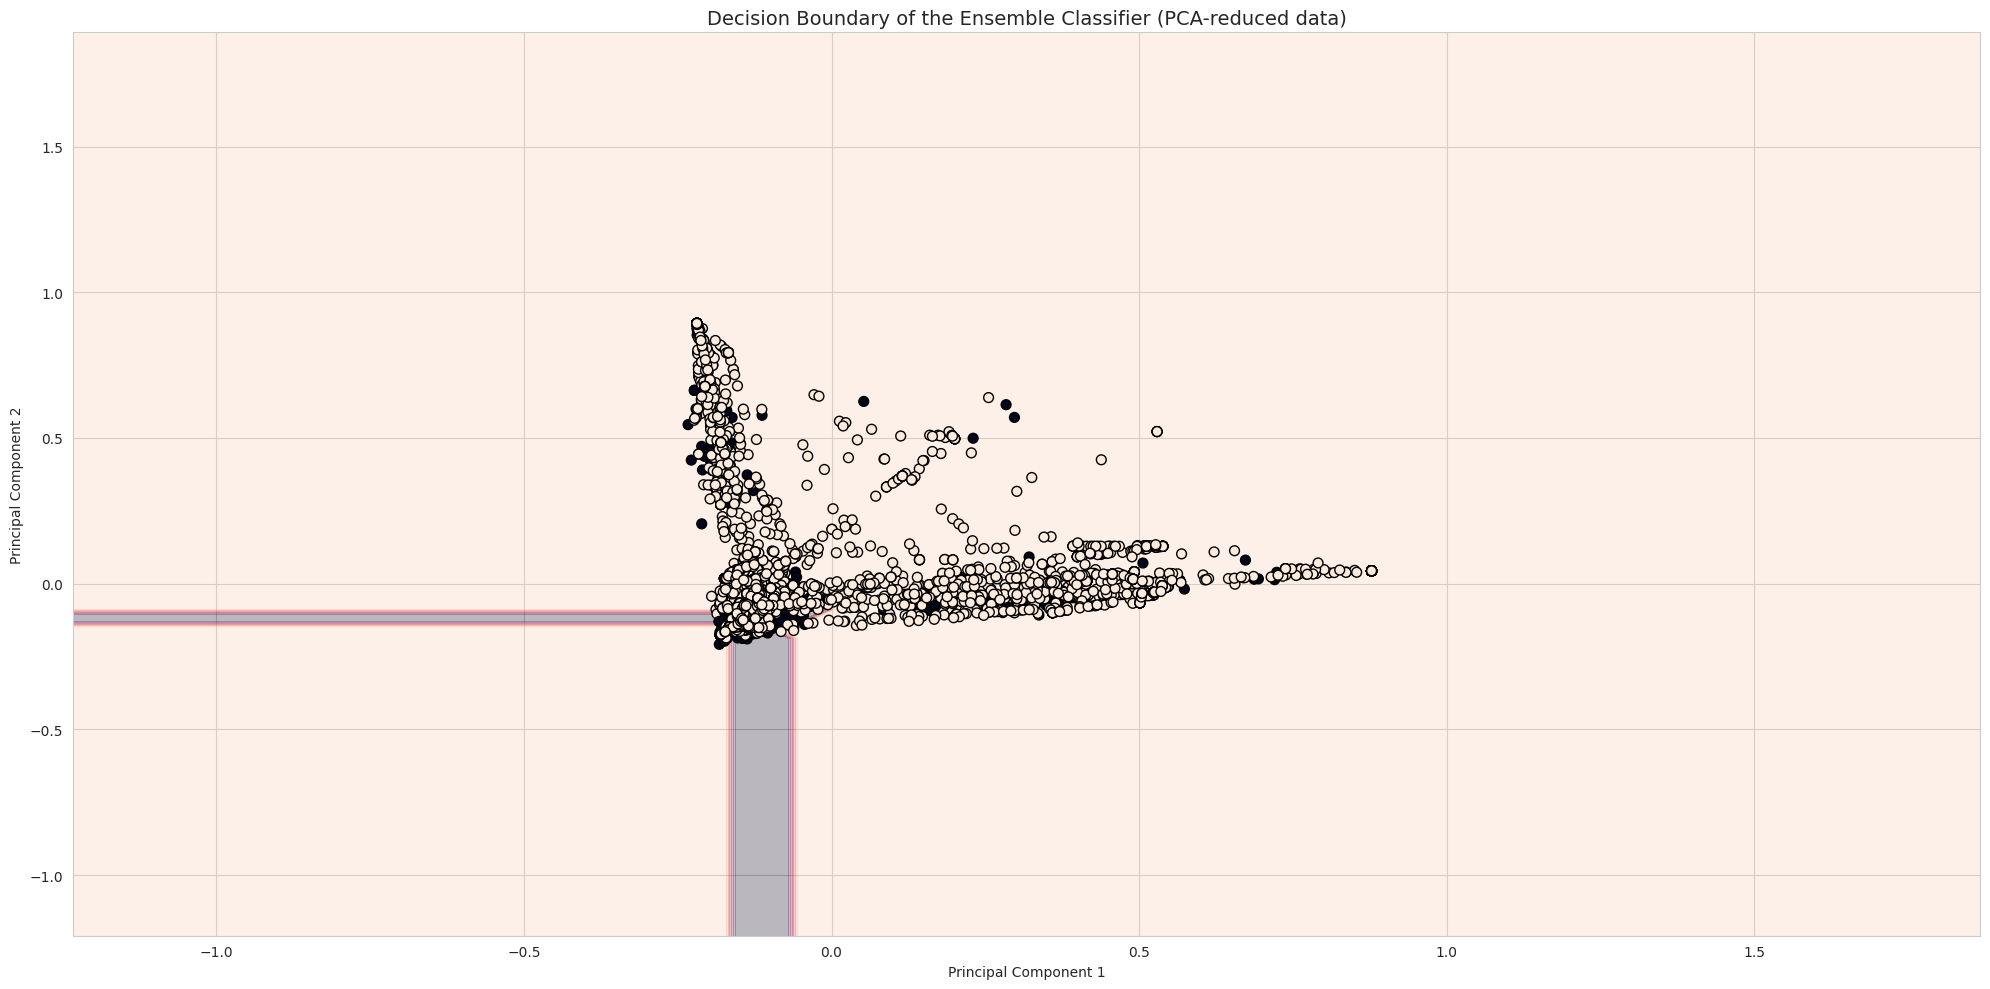


Decision boundary plot generated successfully.


In [35]:
print("\n--- Plotting the decision boundary ---")

def plot_decision_boundary(model, X, y, title, ax):
    """
    Plots the decision boundary for a given model on a Matplotlib axis.
    
    Args:
        model (estimator): The trained scikit-learn model.
        X (np.array): The feature data.
        y (np.array): The target labels.
        title (str): The title for the plot.
        ax (matplotlib.axes.Axes): The axis to plot on.
    """
    # Create a meshgrid to plot the decision surface
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training points
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
    
    # Set the title and axis labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")

# Apply PCA to reduce the data to 2 dimensions for plotting
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_resampled)

# Retrain the model on the 2D PCA data for plotting purposes
# This is necessary because the decision boundary plot requires a model trained on 2D data.
# The `final_voting_clf` model was trained on the full 20 features.
temp_voting_clf = VotingClassifier(
    estimators=best_estimators,
    voting='soft',
    weights=normalized_best_weights,
    n_jobs=-1
)
temp_voting_clf.fit(x_train, y_train)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Call the new plotting function
plot_decision_boundary(
    model=temp_voting_clf, 
    X=x_train, 
    y=y_train, 
    title="Decision Boundary of the Ensemble Classifier (PCA-reduced data)", 
    ax=ax
)

plt.tight_layout()
plt.show()

print("\nDecision boundary plot generated successfully.")

# Model Evaluation

## Evaluate Accuracy of the model and Classification Report

In [36]:
print("\n--- Evaluating the model on the test dataset ---")

# Make predictions on the test set
y_pred = final_voting_clf.predict(x_test)

class_names = ['Not spam', 'Spam']

# Calculate and print metrics
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision Score (Weighted): {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall Score (Weighted): {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score (Weighted): {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score (Macro): {f1_score(y_test, y_pred, average='macro'):.4f}")

# Create and print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


--- Evaluating the model on the test dataset ---

Accuracy Score: 0.8798
Precision Score (Weighted): 0.9119
Recall Score (Weighted): 0.8798
F1 Score (Weighted): 0.8901
F1 Score (Macro): 0.7884

Classification Report:
              precision    recall  f1-score   support

    Not spam       0.97      0.89      0.93       965
        Spam       0.53      0.83      0.65       150

    accuracy                           0.88      1115
   macro avg       0.75      0.86      0.79      1115
weighted avg       0.91      0.88      0.89      1115



## Confusion Metrix

Confusion Matrix:
[[857 108]
 [ 26 124]]


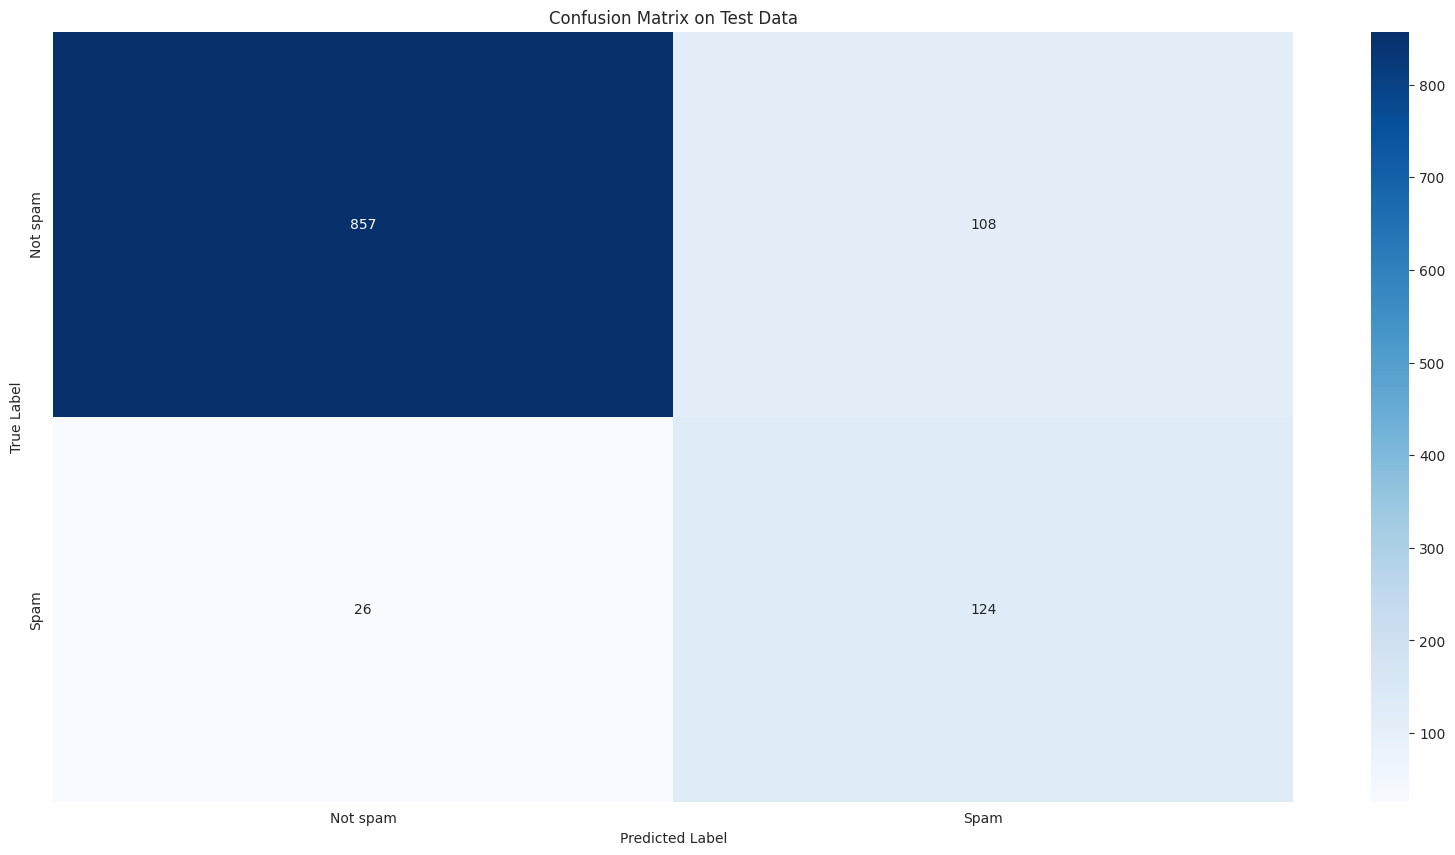

In [37]:
# Create and plot the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix on Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Precision Recall Curve


--- Plotting Precision-Recall Curve for Binary Classification ---


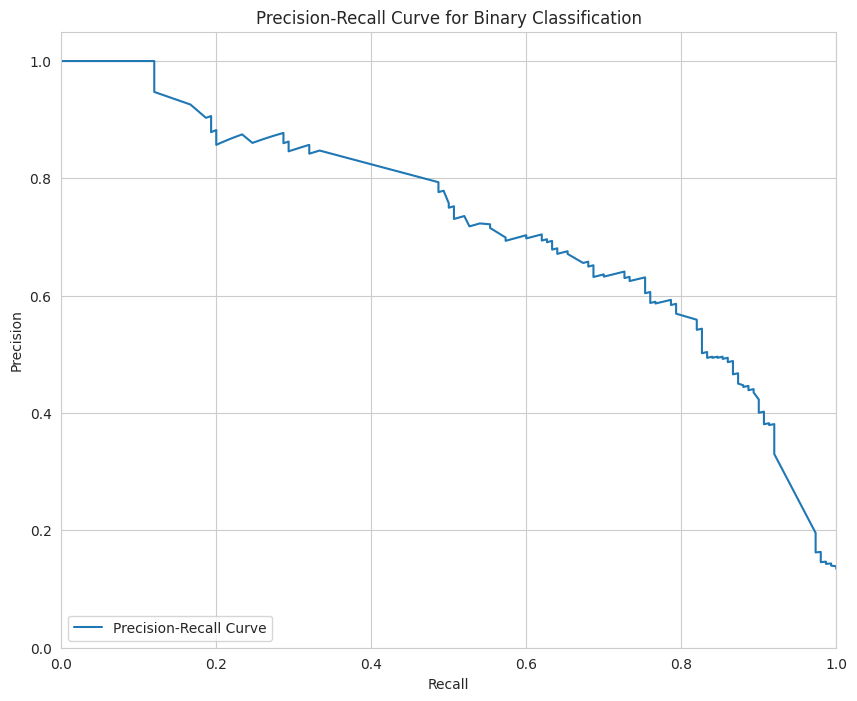

In [38]:
# --- Precision-Recall Curve ---
print("\n--- Plotting Precision-Recall Curve for Binary Classification ---")

y_pred_proba = final_voting_clf.predict_proba(x_test)

# For binary classification, we only need the probabilities of the positive class (class 1)
# y_pred_proba[:, 1] gets the probabilities for 'Spam'
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

# Plot the curve
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for Binary Classification")
plt.legend(loc="lower left")
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.grid(True)
plt.show()

## ROC-AUC Curve


--- Plotting ROC Curve for Binary Classification ---


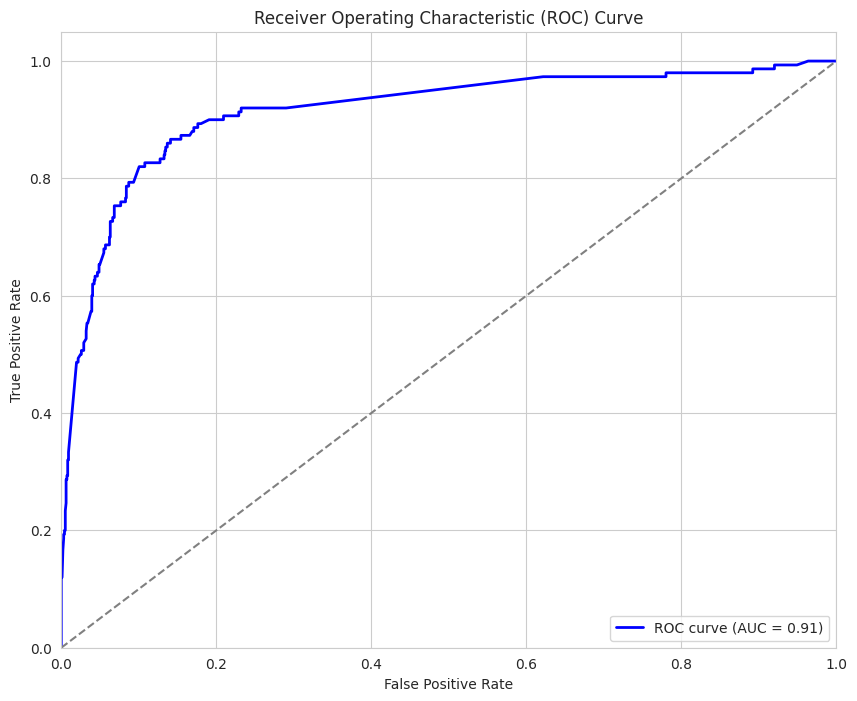


PR and ROC curves generated successfully.


In [39]:
# --- ROC-AUC Curve ---
print("\n--- Plotting ROC Curve for Binary Classification ---")

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("\nPR and ROC curves generated successfully.")

## Custom Text Inference 

In [40]:
print("\n--- Performing Inference on Custom Text ---")

custom_texts = [
    "I absolutely love this new phone, it's so fast!",
    "The restaurant service was incredibly slow and the food was cold.",
    "This is a pretty standard laptop, nothing amazing, nothing bad.",
    "I'm feeling very upset about my test score today."
]

# Step 1: Apply TF-IDF vectorization to the custom text
custom_text_tfidf = tfidf_vectorizer.transform(custom_texts)

# Step 2: Apply PCA transformation to the TF-IDF features
# The model expects a 2-feature input, so this step is crucial.
custom_text_features_pca = pca.transform(custom_text_tfidf.toarray())

# Use the trained model to predict the sentiment (numerical label)
predicted_labels = final_voting_clf.predict(custom_text_features_pca)

# IMPORTANT: Use the LabelEncoder to get the original string labels
predicted_sentiments = le.inverse_transform(predicted_labels)

# Print the results
for text, sentiment in zip(custom_texts, predicted_sentiments):
    print(f"Text: \"{text}\" -> Predicted Sentiment: {sentiment}")


--- Performing Inference on Custom Text ---
Text: "I absolutely love this new phone, it's so fast!" -> Predicted Sentiment: Not spam
Text: "The restaurant service was incredibly slow and the food was cold." -> Predicted Sentiment: Not spam
Text: "This is a pretty standard laptop, nothing amazing, nothing bad." -> Predicted Sentiment: Not spam
Text: "I'm feeling very upset about my test score today." -> Predicted Sentiment: Not spam
